In [5]:
import pandas as pd
import numpy as np

In [11]:
dataset=pd.read_csv('twitter.csv')
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [12]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [13]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [14]:
dataset["labels"]=dataset["class"].map({0:"Hate speech",
                                        1:"Offensive Language",
                                       2:"No hate or offensive language"})
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [15]:
data=dataset[["tweet","labels"]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [19]:
import re
import nltk
import string
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stopwords=set(stopwords.words("english"))
stemmer=nltk.SnowballStemmer("english")

In [21]:
#data cleaning
def clean_data(text):
    text=str(text).lower()
    text=re.sub('https?://\S+|www\.S+','',text)
    text=re.sub('\[.*?\]', '',text)
    text=re.sub('<.*?\>+', '',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(" ") if word not in stopwords]
    text=" ".join(text)
    #stemming
    text=[stemmer.stem(word) for word in text.split(" ")]
    text=" ".join(text)
    return text

In [60]:
data["tweet"]=data["tweet"].apply(clean_data)
data   

C:\Users\Hp\AppData\Local\Temp\ipykernel_13524\2051086683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate or offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivaba look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
x=data["tweet"].tolist()
y=data["labels"]
y

0        No hate or offensive language
1                   Offensive Language
2                   Offensive Language
3                   Offensive Language
4                   Offensive Language
                     ...              
24778               Offensive Language
24779    No hate or offensive language
24780               Offensive Language
24781               Offensive Language
24782    No hate or offensive language
Name: labels, Length: 24783, dtype: object

In [63]:
# Feature Extraction with TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Using n-grams
x_tfidf = tfidf.fit_transform(x)


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.3, random_state=42, stratify=y)

# Building and Training the Model with Class Weight Adjustment
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, class_weight='balanced')
rf.fit(x_train, y_train)

# Predict and Evaluate
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                               precision    recall  f1-score   support

                  Hate speech       0.34      0.55      0.42       429
No hate or offensive language       0.67      0.95      0.79      1249
           Offensive Language       0.97      0.84      0.90      5757

                     accuracy                           0.84      7435
                    macro avg       0.66      0.78      0.70      7435
                 weighted avg       0.89      0.84      0.86      7435



In [65]:
#Confusion matrix and accuracy
cm=confusion_matrix(y_test,y_pred)
cm

array([[   0,    0,  429],
       [   0,   32, 1217],
       [   0,    1, 5756]], dtype=int64)

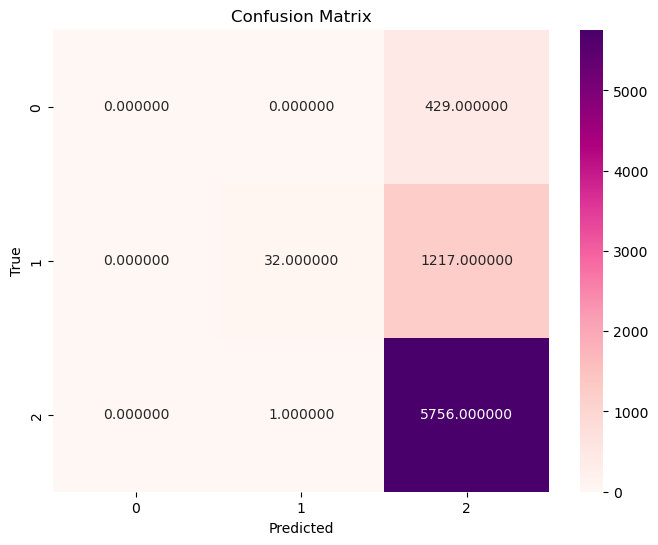

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="f",cmap="RdPu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8429051782111634

In [81]:
sample = "Let's unite and kill all the people protesting against the government"
cleaned_sample = clean_data(sample)
vectorized_sample = tfidf.transform([cleaned_sample])
print("Predicted Class for Sample:", rf.predict(vectorized_sample)[0])


Predicted Class for Sample: Hate speech


In [82]:
s2=""
s2=clean_data(s2)
d2=cv.transform([s2]).toarray()
dt.predict(d2)

array(['Hate speech'], dtype=object)